In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils

import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 13})

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

2022-10-14 17:33:13.231351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/pmix-3.1.3-3sm6emyqaxapunh7rwbjvtaqoqe2e5z3/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openmpi-4.0.2-ipm3dnvlbtxawpi4ifz7jma6jgr7mexq/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openblas-0.3.8-2no6mfziiclwxb7lstxoos335gnhjpes/lib:/spack/apps/gcc/8.3.0/lib64::/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-10-14 17:33:13.231400: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
folder = "/home1/smaruj/akita_utils/bin/insert_virtual_spacing_experiment/data/"

left_filename_bg12 = "2022-10-12_200_100W_100S_spacings_0-1000_left_bg12.h5"               #orientation "<<"
left_filename_bg34 = "2022-10-12_200_100W_100S_spacings_0-1000_left_bg34.h5" 
right_filename_bg12 = "2022-10-12_200_100W_100S_spacings_0-1000_right_bg12.h5"             #orientation ">>"
right_filename_bg34 = "2022-10-12_200_100W_100S_spacings_0-1000_right_bg34.h5"             
convergent_filename_bg12 = "2022-10-12_200_100W_100S_spacings_0-1000_convergent_bg12.h5"   #orientation "><"
convergent_filename_bg34 = "2022-10-12_200_100W_100S_spacings_0-1000_convergent_bg34.h5" 
divergent_filename_bg12 = "2022-10-12_200_100W_100S_spacings_0-1000_divergent_bg12.h5"     #orientation "<>"
divergent_filename_bg34 = "2022-10-12_200_100W_100S_spacings_0-1000_divergent_bg34.h5" 

scd_stats = ["SCD", "INS-16"]
target_dict = {"0" : "mESC_uC",
              "1" : "mESC",
              "2" : "CN",
              "3" : "ncx_CN",
              "4" : "NPC",
              "5" : "ncx_NPC"}

In [3]:
left_df_bg12 = akita_utils.h5_to_df(folder + left_filename_bg12, scd_stats, drop_duplicates_key=None)
left_df_bg34 = akita_utils.h5_to_df(folder + left_filename_bg34, scd_stats, drop_duplicates_key=None)
right_df_bg12 = akita_utils.h5_to_df(folder + right_filename_bg12, scd_stats, drop_duplicates_key=None)
right_df_bg34 = akita_utils.h5_to_df(folder + right_filename_bg34, scd_stats, drop_duplicates_key=None)
convergent_df_bg12 = akita_utils.h5_to_df(folder + convergent_filename_bg12, scd_stats, drop_duplicates_key=None)
convergent_df_bg34 = akita_utils.h5_to_df(folder + convergent_filename_bg34, scd_stats, drop_duplicates_key=None)
divergent_df_bg12 = akita_utils.h5_to_df(folder + divergent_filename_bg12, scd_stats, drop_duplicates_key=None)
divergent_df_bg34 = akita_utils.h5_to_df(folder + divergent_filename_bg34, scd_stats, drop_duplicates_key=None)

In [4]:
frames = [left_df_bg12, left_df_bg34, right_df_bg12, right_df_bg34, convergent_df_bg12, convergent_df_bg34, divergent_df_bg12, divergent_df_bg34]

df = pd.concat(frames)

In [5]:
is_strong = lambda x : True if (x > 20) else False

df["strong"] = df["genomic_SCD"].apply(is_strong)

In [6]:
get_seq_index = lambda x : (x % 200)

df["seq_index"] = df["experiment_id"].apply(get_seq_index)

In [7]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [8]:
for stat in scd_stats:
    df = average_over_targets(df, stat)

In [9]:
df.groupby(["background_index", "orientation"]).agg({"SCD_average": ["mean", "min", "max"]})

SCD_average                    
                                    mean       min       max
background_index orientation                                
1                <<             53.84375  38.75000  126.0625
                 <>             53.09375  38.78125  112.0625
                 ><             51.87500  38.78125  109.0625
                 >>             57.15625  38.81250  126.4375
2                <<             52.15625  38.90625  112.7500
                 <>             50.37500  38.90625  108.0000
                 ><             49.09375  38.90625  103.0625
                 >>             51.46875  38.90625  108.0625
3                <<             66.37500  49.09375  138.5000
                 <>             65.81250  49.12500  124.9375
                 ><             65.56250  49.00000  121.8125
                 >>             71.06250  49.09375  139.3750
4                <<             61.96875  43.03125  135.8750
                 <>             61.21875  43.03125  132.2500
                 ><             58.62500  42.96875  129.5000
                 >>             61.03125  43.09375  127.1875

In [10]:
orientation_dict = {
    ">>" : {"strong_label" : "strong_right",
            "weak_label" : "weak_right",
            "line_style" : "-",
            "strong_1color" : "#4dac26",
            "weak_1color" : "#d01c8b"
        },
    "<<" : {"strong_label" : "strong_left",
            "weak_label" : "weak_left",
            "line_style" : "--",
            "strong_1color" : "#2166ac",
            "weak_1color" : "#f03b20"
        },
    "<>" : {"strong_label" : "strong_divergent",
            "weak_label" : "weak_divergent",
            "line_style" : "-.",
            "strong_1color" : "#fc7a02",
            "weak_1color" : "#636363"
        },
    "><" : {"strong_label" : "strong_convergent",
            "weak_label" : "weak_convergent",
            "line_style" : ":",
            "strong_1color" : "#a819dd",
            "weak_1color" : "#000000"
        },
}

In [11]:
# x axis for all plots

spacing_list = list(np.unique(df["spacer_bp"]))
x = 2 * np.array(spacing_list) + 40

In [12]:
orientation_vs_spacing = df.groupby(["strong", "orientation", "spacer_bp"]).agg({"SCD_average": "mean"}).reset_index()

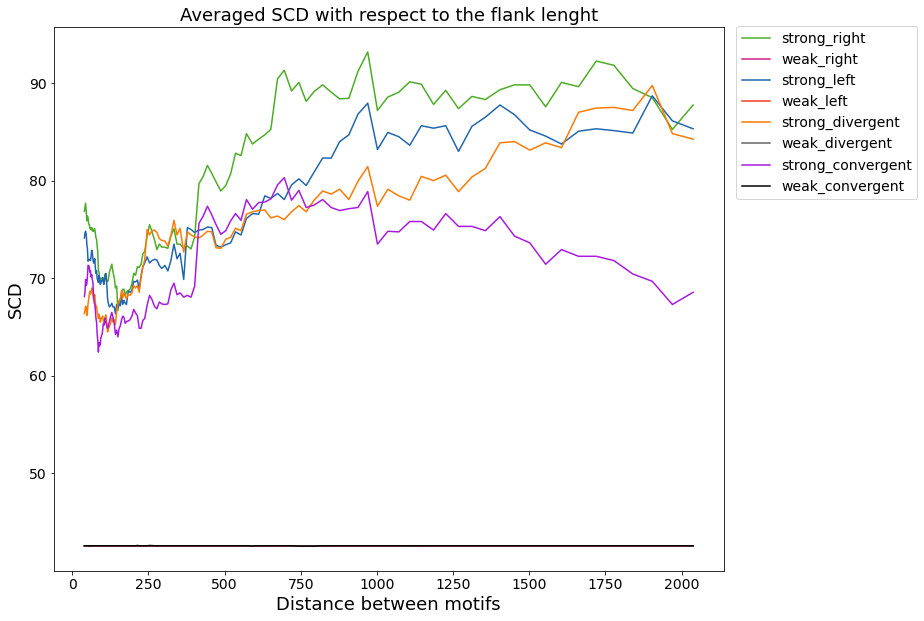

In [13]:
plt.figure(figsize=(12,10))

for key in orientation_dict:
    plt.plot(x, orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == True)]["SCD_average"], 
             label=orientation_dict[key]["strong_label"], 
             c=orientation_dict[key]["strong_1color"])
    plt.plot(x, orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == False)]["SCD_average"], 
             label=orientation_dict[key]["weak_label"], 
             c=orientation_dict[key]["weak_1color"])

# plt.xlim([x[0], x[-1]])
plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Distance between motifs")
plt.ylabel("SCD")
# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.30, 1.015), loc='upper right', ncol=1)
plt.savefig("averaged_SCD.png")

### with smoothing the curves

In [14]:
from cooltools.lib import numutils

In [15]:
bin_size = 29

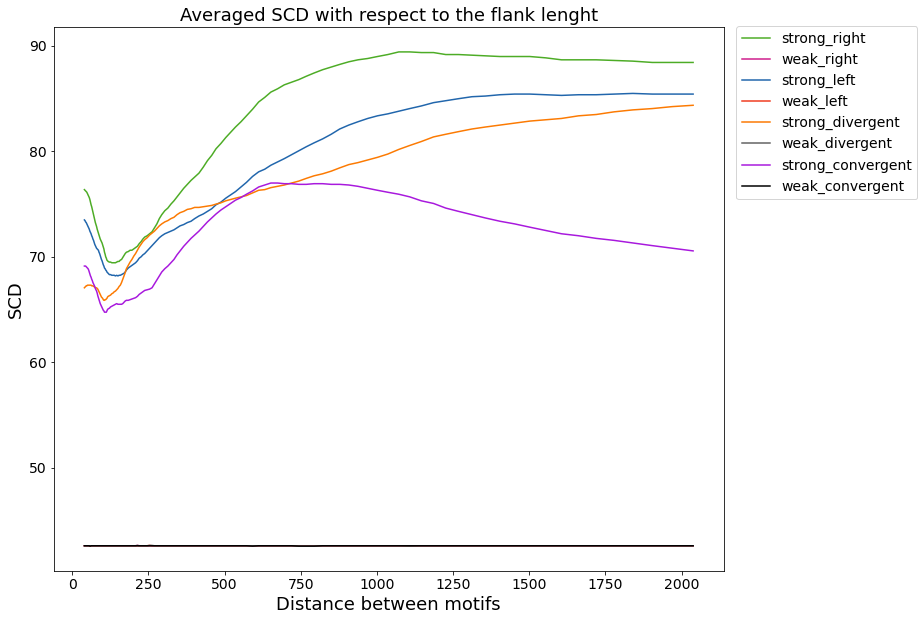

In [16]:
plt.figure(figsize=(12,10))

for key in orientation_dict:
    plt.plot(x, numutils.smooth(orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == True)]["SCD_average"], bin_size),
             label=orientation_dict[key]["strong_label"], 
             c=orientation_dict[key]["strong_1color"])
    plt.plot(x, orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == False)]["SCD_average"], 
             label=orientation_dict[key]["weak_label"], 
             c=orientation_dict[key]["weak_1color"])

# plt.xlim([x[0], x[-1]])
plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Distance between motifs")
plt.ylabel("SCD")
# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.30, 1.015), loc='upper right', ncol=1)
plt.savefig("averaged_SCD.png")

### with percentails band

In [ ]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [ ]:
SCDpercentiles_df = df.groupby(["orientation", "spacer_bp"])["SCD_average"].agg(
    percentile25 = percentile(99), percentile75 = percentile(75)).reset_index()

In [ ]:
SCDpercentiles_df

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))

# plt.figure(figsize=(12,10))

for key in orientation_dict:
    ax.plot(x, numutils.smooth(orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == True)]["SCD_average"], bin_size),
             label=orientation_dict[key]["strong_label"], 
             c=orientation_dict[key]["strong_1color"])
    
    percentile25_line = numutils.smooth(SCDpercentiles_df[SCDpercentiles_df["orientation"] == key]["percentile25"], bin_size)
    percentile75_line = numutils.smooth(SCDpercentiles_df[SCDpercentiles_df["orientation"] == key]["percentile75"], bin_size)
    
    ax.fill_between(x, percentile25_line, 
                    percentile75_line, alpha=0.1, color=orientation_dict[key]["strong_1color"])    
    
    plt.plot(x, orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == False)]["SCD_average"], 
             label=orientation_dict[key]["weak_label"], 
             c=orientation_dict[key]["weak_1color"])

# plt.xlim([x[0], x[-1]])
plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Distance between motifs")
plt.ylabel("SCD")
# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.30, 1.015), loc='upper right', ncol=1)
plt.savefig("averaged_SCD.png")

## backgrounds

In [ ]:
background_vs_orientation_vs_spacings = df.groupby(["background_index", "orientation", "spacer_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [ ]:
background_colors = ["#4dac26", "#2166ac", "#fc7a02", "#a819dd"]

plt.figure(figsize=(12,10))

for background_idx in [1, 2, 3, 4]:
    for key in orientation_dict:
        plt.plot(x, background_vs_orientation_vs_spacings[(background_vs_orientation_vs_spacings["background_index"] == background_idx) & (background_vs_orientation_vs_spacings["orientation"] == key)]["SCD_average"], 
                 orientation_dict[key]["line_style"],
                 c=background_colors[background_idx-1],
                 label=f"bg_{background_idx}_{key}")

plt.legend(loc="upper right")
plt.title("Averaged SCD over each background sequence with respect to the spacer lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.205, 1.015), loc='upper right', ncol=1)
# plt.savefig("backgrounds_SCD.png")

## taking median over backgrounds

In [ ]:
columns_to_take_median = ["INS-16_h1_m1_t0", "INS-16_h1_m1_t1", "INS-16_h1_m1_t2", "INS-16_h1_m1_t3", "INS-16_h1_m1_t4", "INS-16_h1_m1_t5",
                          "SCD_h1_m1_t0", "SCD_h1_m1_t1", "SCD_h1_m1_t2", "SCD_h1_m1_t3", "SCD_h1_m1_t4", "SCD_h1_m1_t5",
                          "SCD_average", "INS-16_average"]
median_list = ["median" for i in range(len(columns_to_take_median))]

dictionary_to_median = dict(zip(columns_to_take_median, median_list))

In [ ]:
new_df = df.groupby(["strong", "orientation","spacer_bp", "seq_index"]).agg(dictionary_to_median).reset_index()

In [ ]:
strong_targets = ["#F20808", "#1119EF", "#09DAE9", "#13F238", "#EC9018", "#E80ACA"]
weak_targets = ["#E65A5A", "#7B7EDB", "#AAEAEF", "#98F0A7", "#EEBE80", "#E69FDD"]

In [ ]:
plt.figure(figsize=(12,10))

for target_idx in range(6):
    target_vs_orientation_spacer = new_df.groupby(["strong", "orientation", "spacer_bp"]).agg({f"SCD_h1_m1_t{target_idx}": "mean"}).reset_index()
    for key in orientation_dict:
        plt.plot(x, target_vs_orientation_spacer[(target_vs_orientation_spacer["orientation"] == key) & (target_vs_orientation_spacer["strong"] == True)][f"SCD_h1_m1_t{target_idx}"],
                 orientation_dict[key]["line_style"],
                 label=orientation_dict[key]["strong_label"] + f"_{target_dict[str(target_idx)]}", 
                 c=strong_targets[target_idx])
        plt.plot(x, target_vs_orientation_spacer[(target_vs_orientation_spacer["orientation"] == key) & (target_vs_orientation_spacer["strong"] == False)][f"SCD_h1_m1_t{target_idx}"],
                 orientation_dict[key]["line_style"],
                 label=orientation_dict[key]["weak_label"] + f"_{target_dict[str(target_idx)]}", 
                 c=weak_targets[target_idx])
    
plt.title("Averaged SCD over each target with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.48, 1.015), loc='upper right', ncol=1)
# plt.savefig("targets_SCD.png")

In [ ]:
orientation_vs_spacer_sequence = new_df[new_df["strong"] == True].groupby(["orientation", "seq_index", "spacer_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [ ]:
for key in orientation_dict:
    helper_df = orientation_vs_spacer_sequence[(orientation_vs_spacer_sequence["orientation"] == key) & (orientation_vs_spacer_sequence["spacer_bp"] == spacing_list[-1])]
    median_seq_idx = helper_df.loc[helper_df["SCD_average"] > helper_df["SCD_average"].median()].sort_values(by=["SCD_average"]).iloc[0]["seq_index"]
    
    orient = orientation_vs_spacer_sequence[orientation_vs_spacer_sequence["orientation"] == key]
    
    plt.figure(figsize=(12,10))

    for seq_idx in range(100):

        if seq_idx != median_seq_idx:
            plt.plot(x, orient[orient["seq_index"] == seq_idx]["SCD_average"], c="lightgray")

    plt.plot(x, orient[orient["seq_index"] == median_seq_idx]["SCD_average"], c="red")
    
    # blue line is average over all weak sequences
    plt.plot(x, orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == False)]["SCD_average"], 
             c="blue")
    
    plt.title(f"Averaged SCD for {key} orientation over each strong sequence with respect to the flank lenght")
    plt.xlabel("Flank lenght")
    plt.ylabel("SCD")
    # plt.savefig(f"sequences_SCD_{key}.png")

### subtracting starting SCD values 

In [ ]:
orient[0:5]


In [ ]:
orient[orient["seq_index"] == seq_idx]

In [ ]:
float(initial_SCDvalue), orient[(orient["seq_index"] == seq_idx) & (orient["spacer_bp"] == 0)]["SCD_average"].values[0]

In [ ]:
initial_SCD_value = orient[(orient["seq_index"] == seq_idx) & (orient["spacer_bp"] == 0)]["SCD_average"]



In [ ]:
orient[orient["seq_index"] == seq_idx]["SCD_average"] - float(initial_SCDvalue)


In [ ]:
for key in ['>>']:#orientation_dict:
    # helper_df = orientation_vs_spacer_sequence[(orientation_vs_spacer_sequence["orientation"] == key) & (orientation_vs_spacer_sequence["spacer_bp"] == spacing_list[-1])]
    # median_seq_idx = helper_df.loc[helper_df["SCD_average"] > helper_df["SCD_average"].median()].sort_values(by=["SCD_average"]).iloc[0]["seq_index"]
    
    orient = orientation_vs_spacer_sequence[orientation_vs_spacer_sequence["orientation"] == key].copy()
    
    plt.figure(figsize=(12,10))

    for seq_idx in range(100):

        initial_SCD_value = orient[(orient["seq_index"] == seq_idx) & (orient["spacer_bp"] == 0)]["SCD_average"].values
        plt.plot(x, orient[orient["seq_index"] == seq_idx]["SCD_average"] - float(initial_SCDvalue))
    
    # blue line is average over all weak sequences
    # plt.plot(x, orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == False)]["SCD_average"], 
    #          c="blue")
    
    plt.title(f"Averaged SCD for {key} orientation over each strong sequence with respect to the flank lenght")
    plt.xlabel("Flank lenght")
    plt.ylabel("SCD")
    # plt.savefig(f"sequences_SCD_{key}.png")

In [ ]:
for key in orientation_dict:
    helper_df = orientation_vs_spacer_sequence[(orientation_vs_spacer_sequence["orientation"] == key) & (orientation_vs_spacer_sequence["spacer_bp"] == spacing_list[-1])]
    median_seq_idx = helper_df.loc[helper_df["SCD_average"] > helper_df["SCD_average"].median()].sort_values(by=["SCD_average"]).iloc[0]["seq_index"]
    
    orient = orientation_vs_spacer_sequence[orientation_vs_spacer_sequence["orientation"] == key]
    
    plt.figure(figsize=(12,10))

    for seq_idx in range(100):
        if seq_idx != median_seq_idx:
            initial_SCD_value = orient[(orient["seq_index"] == seq_idx) & (orient["spacer_bp"] == 0)]["SCD_average"]
            plt.plot(x, orient[orient["seq_index"] == seq_idx]["SCD_average"] - float(initial_SCDvalue), c="lightgray")
    
    median_initial_SCD_value = orient[(orient["seq_index"] == median_seq_idx) & (orient["spacer_bp"] == 0)]["SCD_average"]
    plt.plot(x, orient[orient["seq_index"] == median_seq_idx]["SCD_average"] - float(median_initial_SCD_value), c="red")
    
    # blue line is average over all weak sequences
    # plt.plot(x, orientation_vs_spacing[(orientation_vs_spacing["orientation"] == key) & (orientation_vs_spacing["strong"] == False)]["SCD_average"], 
    #          c="blue")
    
    plt.title(f"Averaged SCD for {key} orientation over each strong sequence with respect to the flank lenght")
    plt.xlabel("Flank lenght")
    plt.ylabel("SCD")
    # plt.savefig(f"sequences_SCD_{key}.png")